# 回路量子電磁力学 (Circuit Quantum Electrodynamics)

## 目次

1. [序論](#intro)
2. [Schrieffer-Wolff変換](#tswt)
3. [Jaynes-Cummingsハミルトニアンのブロック対角化](#bdotjch)
4. [多準位のトランズモンへの拡張](#full-transmon)
5. [量子ビットのドライブ](#qdwcqed)
6. [交差共鳴 (Cross Resonance) ゲート](#tcreg)

## 1. 序論 <a id='intro'></a>

共振器量子電磁力学（Cavity Quantum Electrodynamics、CQED）における原子と光共振器の相互作用とのアナロジーで、回路量子電磁力学（circuit QED、cQED）は量子ビットとマイクロ波共振器との相互作用を記述する単純なモデルです。このモデルは、共振器中の光子数、原子（量子ビット）の状態、原子（量子ビット）と共振器との電気双極子相互作用を含みます。前節で見たように、トランズモンは多準位系ですが、トランズモンの非調和性（Anharmonicity）により基底状態 $|0\rangle = |g\rangle$ と第一励起状態 $|1\rangle = |e\rangle$ に限定することができます。従って、トランズモンを、以下のパウリスピン行列で記述した量子ビットと考えることができます。
$$
\sigma^x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \qquad
\sigma^y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \qquad
\sigma^z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \qquad
$$
これらはブロッホ球の各軸周りの回転を意味します。この相互作用を記述する最も単純なモデルは、回転波近似をしたJaynes-Cummingsハミルトニアン
$$
H_{\rm JC}^{\rm (RWA)}/\hbar = \omega_r a^\dagger a - \frac{1}{2} \omega_q \sigma^z + g(a^\dagger \sigma^- + a \sigma^+)
$$
です。 $\omega_r$ と $\omega_q$ はそれぞれ共振器と"量子ビット"の共振周波数で、 $a$ ($a^\dagger$) は共振器中の光子の消滅（生成）演算子、 $g$ は電気双極子の結合（真空ラビ分裂の半分）です。ここで、演算子のハットを省いています。この式で、第一項は共振器の中の光子数、第二項は量子ビットの状態、第三項は電気双極子相互作用に対応し、 $\sigma^\pm = (1/2)(\sigma^x \mp i\sigma^y)$ は量子ビットの昇降演算子です。（前章で述べたように、スピンの昇降演算子と逆符号になっています。）

このハミルトニアンは厳密に解くことができ、解は量子ビットと共振器の状態のハイブリッドになっていて、共振器中の光子と量子ビットが共振（$\omega_r = \omega_q$）している時、それらの励起のスワップがレート $g$ で起こっています。例えば、第3項の $a^\dagger \sigma^-$ は、共振器内に光子を生成し、量子ビットを $|1\rangle$ から $|0\rangle$ に下げ、 $a\sigma^+$ は逆に光子を消滅し、量子ビットを $|0\rangle$ から $|1\rangle$ に上げます。興味深い現象ですが、量子コンピューターにとって、扱いたいのは量子ビットであって、このようなハイブリッド状態ではありません。これは、共振器が量子ビットの摂動として振る舞う（逆も成り立つ）ようにしたいということで、従って互いの存在に "dressed" された状態になります。 Schrieffer-Wolff (S-W) 変換と呼ばれる摂動論を用いることにより、望ましい形で量子ビットと共振器の特性を計算できるようになります。ここでは、量子ビットにこの手法を適用していますが、同様の手法はトランズモンの全準位に適用できます。トランズモンの高準位では、無視できない効果が表れ、設計・シミュレーションの際に考慮しなければなりません。

## 2. Schrieffer-Wolff変換 <a id='tswt'></a>

<details>
    <summary>Schrödinger方程式（ここをクリック）</summary>
量子力学の問題は、多くの場合ハミルトニアンの固有値方程式を対角化することに帰結します。
$$
H\psi_m = E_m \psi_m \qquad {\rm for} \quad 1 \le m \le n
$$
$\psi_m$ は固有値 $E_m$ に対応した固有状態です。この時、 $H' = U H U^\dagger$ が対角になるようなユニタリー行列 $U$ が存在し、固有値方程式は
$$
\hat{H} \psi_m = E_m \psi_m \Longrightarrow U H U^\dagger U \psi_m = E_m U \psi_m \Longrightarrow H' \psi_m' = E_m \psi_m'
$$
となり、 $\psi_m' = U\psi_m$ は変換した固有状態で、ハミルトニアンは
$$
H' = \begin{pmatrix}
E_1 & 0 & \cdots & 0 \\
0 & E_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & 0 \\
0 & 0 & \cdots & E_n \end{pmatrix}
$$
と対角化されます。
</details>

S-W変換では、ハミルトニアンの対角化でなく、*ブロック対角化*ができます。ハミルトニアンが対角項と摂動項に分けられると仮定し、
$$
H \quad = \quad \underbrace{\begin{pmatrix}
\Box &  &  &  &  &  &  \\
 & \Box &  &  &  &  &  \\
 &  & \Box &  &  &  &  \\
 &  &  & \Box &  &  &  \\
 &  &  &  & \Box &  &  \\
 &  &  &  &  & \Box &  \\
 &  &  &  &  &  & \Box \end{pmatrix}}_\text{対角項} \quad + \quad 
\underbrace{\begin{pmatrix}
\times & \times & \times & \times & \cdot & \cdot & \cdot \\
\times & \times & \times & \times & \cdot & \cdot & \cdot \\
\times & \times & \times & \times & \cdot & \cdot & \cdot \\
\times & \times & \times & \times & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot & \times & \times & \times \\
\cdot & \cdot & \cdot & \cdot & \times & \times & \times \\
\cdot & \cdot & \cdot & \cdot & \times & \times & \times \end{pmatrix}}_\text{摂動項}
$$
$H_0$ を対角項とし、摂動項をさらにブロック対角項 $H_1$ と非ブロック対角項 $H_2$ に分け、 $H = H_0 + H_1 + H_2$ とします。
$$
H \quad = \quad \underbrace{\begin{pmatrix}
\Box &  &  &  &  &  &  \\
 & \Box &  &  &  &  &  \\
 &  & \Box &  &  &  &  \\
 &  &  & \Box &  &  &  \\
 &  &  &  & \Box &  &  \\
 &  &  &  &  & \Box &  \\
 &  &  &  &  &  & \Box \end{pmatrix}}_\text{対角項}
\quad + \quad
\underbrace{\begin{pmatrix}
\times & \times & \times & \times &  &  &  \\
\times & \times & \times & \times &  &  &  \\
\times & \times & \times & \times &  &  &  \\
\times & \times & \times & \times &  &  &  \\
 &  &  &  & \times & \times & \times \\
 &  &  &  & \times & \times & \times \\
 &  &  &  & \times & \times & \times \end{pmatrix}}_\text{blockブロック対角項}
\quad + \quad
\underbrace{\begin{pmatrix}
 &  &  &  & \cdot & \cdot & \cdot \\
 &  &  &  & \cdot & \cdot & \cdot \\
 &  &  &  & \cdot & \cdot & \cdot \\
 &  &  &  & \cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot & \cdot &  &  &  \\
\cdot & \cdot & \cdot & \cdot &  &  &  \\
\cdot & \cdot & \cdot & \cdot &  &  &  \end{pmatrix}}_\text{非ブロック対角項}
$$

以下の有効ハミルトニアン $H_{\rm eff}$ がブロック対角化されるように、演算子 $S$ を求めます。

$$
H_{\rm eff} = e^{-S} H e^{S} = \sum_{m=0}^\infty \frac{1}{m!} [H, S]^{(m)} = \sum_{m=0}^\infty \lambda^m H^{(m)}
$$

$H^{(m)}$ は $H$ の逐次近似($H^{(0)} = H_0$)であり、交換関係の一般項は再帰的に

$$
[H,S]^{(m)} = [[H,S]^{(m-1)},S] \qquad {\rm with} \qquad [H,S]^{(0)} = H
$$

と定義します。ここで、 $S$ を $\lambda$ の次数を持ったテーラー級数で表し、

$$ S = \sum_{m=1}^\infty \lambda^m S^{(m)} $$

有効ハミルトニアンを $H_1+H_2$ の $\lambda$ 2次までの摂動で展開します。

$$
H_{\rm eff} = H_0 + \lambda (H_1+H_2) + \left[H_0 + \lambda(H_1+H_2), \lambda S^{(1)}\right] 
  + \frac{1}{2} \left[ \left[ H_0 + \lambda(H_1+H_2), \lambda S^{(1)}\right], \lambda S^{(1)}\right]
  + \left[H_0 + \lambda(H_1+H_2), \lambda^2 S^{(2)}\right] + \ldots \\
  \approx H_0 + \lambda \left( H_1 + H_2 + \left[H_0, S^{(1)}\right] \right) 
  + \lambda^2 \left( \left[H_1+H_2, S^{(1)}\right] + \frac{1}{2} \left[ \left[H_0, S^{(1)},\right] S^{(1)}\right] + \left[H_0, S^{(2)}\right]\right)
$$

ここで、 $H_{\rm eff}$ の非ブロック対角項を消すために、 $S$ は非ブロック対角で反エルミートでなければなりません。その結果、 $H_{\rm eff}$ の非ブロック対角項は

$$
H_{\rm eff}^{\rm off-diag} = \sum_{m=0}^\infty \frac{1}{(2m+1)!} [\underbrace{H_0 + \lambda H_1}_\text{ブロック対角}, S]^{(2m+1)} + \sum_{m=0}^\infty \frac{1}{(2m)!} [\underbrace{\lambda H_2}_\text{非ブロック対角}, S]^{(2m)} \equiv 0
$$

となります。ここで、1つ目の級数の交換関係 $[H_0 + \lambda H_1, S]$ は非ブロック対角であり、2つ目の級数の交換関係 $[\lambda H_2, S]$ はブロック対角です。これは、ブロック対角行列と非ブロック対角行列の交換関係は非ブロック対角であり、2つの非ブロック対角行列の交換関係はブロック対角になるからです。1つ目の項は、 $[H_0 + \lambda H_1, S]^{(n)}$（$n$ は奇数）、1つ目の項は、 $[\lambda H_2, S]^{(n)}$（$n$ は偶数）と表記することもでき、これらは全て非ブロック対角になります。ハミルトニアンの非対角項を2次の摂動まで展開すると、

$$
H_{\rm eff}^{\rm off-diag} = \left[ H_0 + \lambda H_1, \lambda S^{(1)} \right]+\lambda H_2 + \left[H_0 + \lambda H_1, \lambda^2 S^{(2)}\right]
  + \frac{1}{3!} \left[ H_0+\lambda H_1, \lambda S^{(1)}\right]^{(3)} + \frac{1}{2!} \left[ \lambda H_2, \lambda S^{(1)}\right]^{(2)} \\
  = \lambda \left( \left[ H_0, S^{(1)} \right] + H_2 \right) + \lambda^2 \left( \left[H_1, S^{(1)} \right] + \left[H_0, S^{(2)}\right]\right) + \ldots.
$$
となります。 $\lambda$ の各次数でゼロになるため、 $S^{(m)}$ を以下の式で決めることができます。
$$
[H_0, S^{(1)}] = -H_2 \qquad
[H_0, S^{(2)}] = -[H_1, S^{(1)}] \qquad
[H_0, S^{(3)}] = -[H_1, S^{(2)}] - \frac{1}{3} [[H_2, S^{(1)}], S^{(1)}]
$$
これらの式を満たすアンザッツが一意に決まることはWinklerによって示されました。この結果、有効ハミルトニアンは

$$
H_{\rm eff} = H_0+H_1+[H_2,S^{(1)}] + \frac{1}{2} [[H_0, S^{(1)}], S^{(1)}] + \ldots = H_0+H_1+\frac{1}{2}[H_2,S^{(1)}] + \ldots
$$

とブロック対角化されます。ここで、 $\lambda \to 1$ としました。

## 3. Jaynes-Cummingsハミルトニアンのブロック対角化 <a id='bdotjch'></a>

S-W変換を行う際に2つ問題があります：1) 正しいアンザッツを見つけることと、2) 計算を実行すること、です。多くの例では、非対角項 $H_2$ と似た形のアンザッツ（$H_2$ を反エルミートにしたもの）を用い、帰納的に確かめます。最近、arXivに掲載された、[A Systematic Method for Schrieffer-Wolff Transformation and Its Generalizations](http://www.arxiv.org/abs/2004.06534) という論文では、システマチックにアンザッツを得る方法を示し、以下に示したJaynes-Cummingsハミルトニアンを含め多くの系に適用しています。

この方法では、*ジェネレーター* $\eta$ を $\eta=[H_0, H_2]$ と計算し、その係数を未知とします。 $[H_0, \eta]=-H_2$ を満たす $\eta$ の係数を求め、 $S^{(1)}=\eta$ とします。ここで、 $H_0$ と $H_2$ のエルミート性から、 $\eta$ や $S^{(1)}$ が反エルミートであることが示せます。

計算を簡単にするために、代数計算のためのPythonパッケージ [`sympy`](http://www.sympy.org) を用います。

In [1]:
# import SymPy and define symbols
import sympy as sp
sp.init_printing(use_unicode=True)
wr = sp.Symbol('\omega_r') # resonator frequency
wq = sp.Symbol('\omega_q') # qubit frequency
g = sp.Symbol('g', real=True) # vacuum Rabi coupling
Delta = sp.Symbol('Delta', real=True) # wr - wq; defined later

In [2]:
# import operator relations and define them
from sympy.physics.quantum.boson import BosonOp
a = BosonOp('a') # resonator photon annihilation operator
from sympy.physics.quantum import pauli, Dagger, Commutator
from sympy.physics.quantum.operatorordering import normal_ordered_form

# Pauli matrices
sx = pauli.SigmaX()
sy = pauli.SigmaY()
sz = pauli.SigmaZ()

# qubit raising and lowering operators
splus = pauli.SigmaPlus()
sminus = pauli.SigmaMinus()

In [3]:
# define J-C Hamiltonian in terms of diagonal and non-block diagonal terms
H0 = wr*Dagger(a)*a - (1/2)*wq*sz; 
H2 = g*(Dagger(a)*sminus + a*splus); 
HJC = H0 + H2; HJC # print

In [4]:
# using the above method for finding the ansatz
eta = Commutator(H0, H2); eta

`sympy`で`doit()`、`expand`、`normal_ordered_form`、`qsimplify_pauli`のメソッドを用いることで、交換関係の演算を行い、展開し、ボーズ粒子を正規順序（生成演算子、消滅演算子の順）にし、パウリ代数を簡単化できます。これを $\eta$ に適用します。

In [5]:
pauli.qsimplify_pauli(normal_ordered_form(eta.doit().expand()))

ここで $A$、$B$ をそれぞれ $a^\dagger \sigma_-$、$a\sigma_+$ の係数とすると、交換関係 $[H_0, \eta]$ は以下のようになり、

In [6]:
A = sp.Symbol('A')
B = sp.Symbol('B')
eta = A * Dagger(a) * sminus - B * a * splus;
pauli.qsimplify_pauli(normal_ordered_form(Commutator(H0, eta).doit().expand()))

これが $-H_2$ と等しくなるので、

In [7]:
-H2

$A = B = -g/\Delta$ であることがわかります。ここで、 $\Delta = \omega_r - \omega_q$ は共振器と量子ビットの周波数差です。従って、 $S^{(1)}$ は

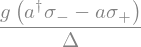

In [8]:
S1 = eta.subs(A, -g/Delta)
S1 = S1.subs(B, -g/Delta); S1.factor()

と求まります。そして、 $H_0$ に2次の補正を加えた有効ハミルトニアンを以下のように計算することができます。

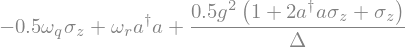

In [9]:
Heff = H0 + 0.5*pauli.qsimplify_pauli(normal_ordered_form(Commutator(H2, S1).doit().expand())).simplify(); Heff

これは以下のように書き換えることができ、
$$
H_{\rm eff} = \left(\omega_r + \frac{g^2}{\Delta}\sigma_z\right)a^\dagger a  - \frac{1}{2}\left(\omega_q -\frac{g^2}{\Delta}\right) \sigma_z
$$
これは共振器周波数が*ac Starkシフト*と呼ばれる量子ビットの状態に依存した周波数シフト $\chi \equiv g^2/\Delta$ を受けることを示し、同時に量子ビットの側では*Lambシフト*と呼ばれる量子的真空場のゆらぎによる周波数シフトを示しています。

## 4. 多準位のトランズモンへの拡張 <a id='full-transmon'></a>

実際は2準位の*量子ビット*でなく、多準位の*トランズモン*を用いているので、デバイスを設計・シミュレートする際には、高次のエネルギー項を考慮する必要があります。読み出し共振器と結合した、完全なトランズモンのハミルトニアンは以下のように書けます。

$$
H^{\rm tr} = \omega_r a^\dagger a + \sum_j \omega_j |j\rangle\langle j| + g\left(a^\dagger c + ac^\dagger \right)
$$

ここで、 $c = \sum_j \sqrt{j+1}|j\rangle\langle j+1|$ はトランズモンの下降演算子、 $\omega_j = \left(\omega - \frac{\delta}{2}\right)j + \frac{\delta}{2} j^2$ は前節で定義したトランズモンの各準位の周波数、 $\omega$ は量子ビット周波数、 $\delta$ は非調和性(Anharmonicity)です。

$$
S^{(1)} = \sum_j \alpha_j a^\dagger \sqrt{j+1}|j\rangle\langle j+1| - \alpha_j^* a \sqrt{j+1}|j+1\rangle\langle j|
$$

S-W変換の条件式 $[H_0, S^{(1)}] = -H_2$ から $\alpha = \alpha^* = -\frac{g}{\omega_r - \omega - \delta j}$ と求まり、以下のように2次の有効ハミルトニアンが得られます。

$$
H^{\rm tr}_{\rm eff} = \left( \omega_r + \sum_j \frac{g^2(\omega_r-\omega+\delta)}{(\omega_r-\omega-\delta j)(\omega_r - \omega - \delta(j-1))} |j\rangle\langle j| \right) a^\dagger a + \sum_j 
\left[
j\omega + \frac{\delta}{2} (j-1)j + \frac{jg^2}{\omega-\omega_r+(j-1)\delta} \right]|j\rangle\langle j|
$$

## 5. cQEDでの量子ビットのドライブ <a id='qdwcqed'></a>

[Blais *et al* (2004)](https://arxiv.org/abs/cond-mat/0402216) より、ドライブハミルトニアンを
$$
H^d(t) = \xi(t)\left( a^\dagger e^{-i\omega_d t} + ae^{i\omega_d t}\right)
$$
とし、これをJaynes-Cummingsハミルトニアンに加え、ドライブ周波数の回転座標系に変換します。
$$
H = \Delta_r a^\dagger a - \frac{1}{2} \Delta_q \sigma^z + g(a^\dagger \sigma^- + a\sigma^+) + \xi(t)(a^\dagger + a)
$$
ここで、 $\Delta_r = \omega_r - \omega_d$ 、 $\Delta_q = \omega_q - \omega_d$ です。[Lev Bishopの博士論文](https://arxiv.org/abs/1007.3520) に示されるように、以下のGlauber演算子を用いて、ドライブが量子ビットに直接作用するよう変形します。
$$
D(\alpha) = e^{\alpha(t) a^\dagger - \alpha^*(t) a}
$$
Hadamardの補題
$$
e^{A}Be^{-A} = B + [A,B] + \frac{1}{2!} [A,[A,B]] + \frac{1}{3!}[A,[A,[A,B]]] + \ldots
$$
を用いて以下の計算をすると、 $D$ は $a^{(\dagger)}$ を $\alpha^{(*)}$ だけ変位させるように作用することがわかり、
$$
D^\dagger a^{(\dagger)} D = \exp\{-\alpha(t) a^\dagger + \alpha^*(t) a\} a^{(\dagger)}\exp\{\alpha(t) a^\dagger - \alpha^*(t) a\} 
= a^{(\dagger)} + \left[-\alpha(t) a^\dagger + \alpha^*(t) a, a^{(\dagger)}\right] + \frac{1}{2!}\left[-\alpha(t) a^\dagger + \alpha^*(t) a, \left[-\alpha(t) a^\dagger + \alpha^*(t) a, a^{(\dagger)}\right]\right] + \ldots
 = a^{(\dagger)} + \alpha^{(*)}
$$

$$
D^\dagger a^\dagger a D = a^\dagger a + \left[-\alpha(t) a^\dagger + \alpha^*(t) a, a^\dagger a\right] + \frac{1}{2!}\left[-\alpha(t) a^\dagger + \alpha^*(t) a, \left[-\alpha(t) a^\dagger + \alpha^*(t) a, a^\dagger a\right]\right] + \ldots
= a^\dagger a + \alpha(t)a^\dagger + \alpha^*(t)a + |\alpha(t)|^2
$$

従ってハミルトニアンは以下のようになります。

$$
\tilde{H} = D^\dagger H D - iD^\dagger \dot{D} = \Delta_r\left(a^\dagger a + \alpha(t)a^\dagger + \alpha^*(t)a + |\alpha(t)|^2\right) - \frac{1}{2} \Delta_q \sigma^z \\ + g\left((a^\dagger + \alpha^*(t))\sigma^- + (a+\alpha(t))\sigma^+\right) + \xi(t)\left(a^\dagger + \alpha^*(t) + a + \alpha(t) \right) - i\left(\dot{\alpha}(t) a^\dagger - \dot{\alpha}^*(t) a\right) \\
= \Delta_r a^\dagger a - \frac{1}{2}\Delta_q \sigma^z + g\left((a^\dagger + \alpha^*(t))\sigma^- + (a+\alpha(t))\sigma^+\right) \\
+\xi(t)\left(a^\dagger  + a \right) + \Delta_r\left(\alpha(t)a^\dagger + \alpha^*(t)a\right)- i\left(\dot{\alpha}(t) a^\dagger - \dot{\alpha}^*(t) a\right)
$$

ここで演算子を含まない項を落としました。以下の式を満たすように $\alpha(t)$ を選ぶと、最後の行はゼロになります。

$$
-i\dot{\alpha}(t) + \Delta_r \alpha(t) + \xi(t) = 0
$$

最後に、Rabi周波数 $\Omega(t) = 2g\alpha(t)$ を導入すると、ハミルトニアンは

$$
\tilde{H} = \Delta_r a^\dagger a - \frac{1}{2}\Delta_q \sigma^z + g\left(a^\dagger\sigma^- + a\sigma^+\right)
+\frac{1}{2} \left( \Omega^*(t)\sigma^- + \Omega(t) \sigma^+\right)
$$

となります。ハミルトニアンのドライブ項は非ブロック対角なので、Schrieffer-Wolff変換を適用します。ここでRabi周波数を実数とします($\Omega^*(t) = \Omega(t)$)。

$$
[\tilde{H}^d, S^{(1)}] = -\frac{\Omega(t)}{2} \left[ (\sigma^- + \sigma^+),\frac{g}{\Delta}\left( a^\dagger \sigma^- - a\sigma^+\right)\right] = \frac{g\Omega(t)}{2\Delta}(a + a^\dagger)\sigma^z
$$

これを有効ハミルトニアンに加えると、以下の式が得られます。

$$
\tilde{H}_{\rm eff} = \left( \Delta_r + \frac{g^2}{\Delta}\sigma^z\right) a^\dagger a - \frac{1}{2}\left(\Delta_q - \frac{g^2}{\Delta}\right) \sigma^z + \frac{\Omega(t)}{2}\sigma^x
+ \frac{g\Omega(t)}{4\Delta}(a + a^\dagger)\sigma^z
$$

ここで、 $z$ 回転を除去するために、Lambシフトした量子ビットでドライブする必要があることがわかります($\Delta_q = \frac{g^2}{\Delta}$)。もう1つの $\sigma^z$ 項は、分散結合領域(dispersive regime)では $\Delta \gg g$ となるため無視できます。

## 6. 交差共鳴 (Cross Resonance) ゲート <a id='tcreg'></a>

量子ビット1を量子ビット2の周波数でドライブするハミルトニアンは、以下のように書けます。

$$
H^d(t) = \frac{\Omega(t)}{2} \left( \sigma_1^+ e^{-i\tilde{\omega}_2 t} + \sigma_1^- e^{i\tilde{\omega}_2 t}\right)
$$

2つの量子ビットとその相互作用を表すハミルトニアンに対するS-W変換のアンザッツ $S^{(1)}=-\frac{J}{\Delta_{12}}(\sigma_1^+ \sigma_2^- - \sigma_1^- \sigma_2^+)$ を用いて、ドライブ項にS-W変換を適用します。

$$
[\tilde{H}^d, S^{(1)}] = -\frac{J\Omega(t)}{2\Delta_{12}} \left[ \sigma_1^+ e^{-i\tilde{\omega}_2 t} + \sigma_1^- e^{i\tilde{\omega}_2 t}, \sigma_1^+ \sigma_2^- - \sigma_2^+ \sigma_1^-\right] 
=-\frac{J\Omega(t)}{2\Delta_{12}} \left(\sigma_1^z \sigma_2^+ e^{-i\tilde{\omega}_2 t}
+\sigma_1^z \sigma_2^- e^{i\tilde{\omega}_2 t} \right)
$$

$\tilde{\omega}_2$ の回転座標系に移ると、有効交差共鳴ハミルトニアンを得ます。

$$
\tilde{H}_{\rm eff}^{\rm CR} = - \frac{\tilde{\omega}_1-\tilde{\omega}_2}{2}\sigma_1^z 
+ \frac{\Omega(t)}{2} \left(\sigma_2^x - \frac{J}{2\Delta_{12}} \sigma_1^z \sigma_2^x \right)
$$

始めの2つの項はそれぞれ、量子ビット1へのStarkシフトによる $ZI$ 相互作用、量子ビット2の無条件 $IX$ 回転に関連し、最後の項はエンタングルメントを生じる $ZX$ 相互作用を示します。量子ビット1を $|0\rangle$ と $|1\rangle$ の等しい重ね合わせ状態にし、$x$軸周りの $\pi/2$ 回転に相当する交差共鳴ゲートを適用すると、最大のエンタングル状態が得られます。[このチュートリアル](https://github.com/Qiskit/qiskit-tutorials/blob/9405254b38312771f8d5c2dd6f451cec35307995/tutorials/noise/1_hamiltonian_and_gate_characterization.ipynb)で、トランズモンの交差共鳴ハミルトニアンをQiskitで特性評価しています。他に交差共鳴ゲートについての参考文献として、 [Chow *et al* (2011)](https://arxiv.org/abs/1106.0553) や [Sheldon *et al* (2016)](https://arxiv.org/abs/1603.04821) もあります。
